In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [2]:
sent_embeddings = genfromtxt('../data/processed/temple_radio_sentence_embeddings.csv', delimiter=',')

In [3]:
sentences = pd.read_csv("../data/processed/temple_radio_sentences.csv", header=None)

In [4]:
num_clusters = 4
model = AgglomerativeClustering(n_clusters=num_clusters)
model = model.fit(sent_embeddings)

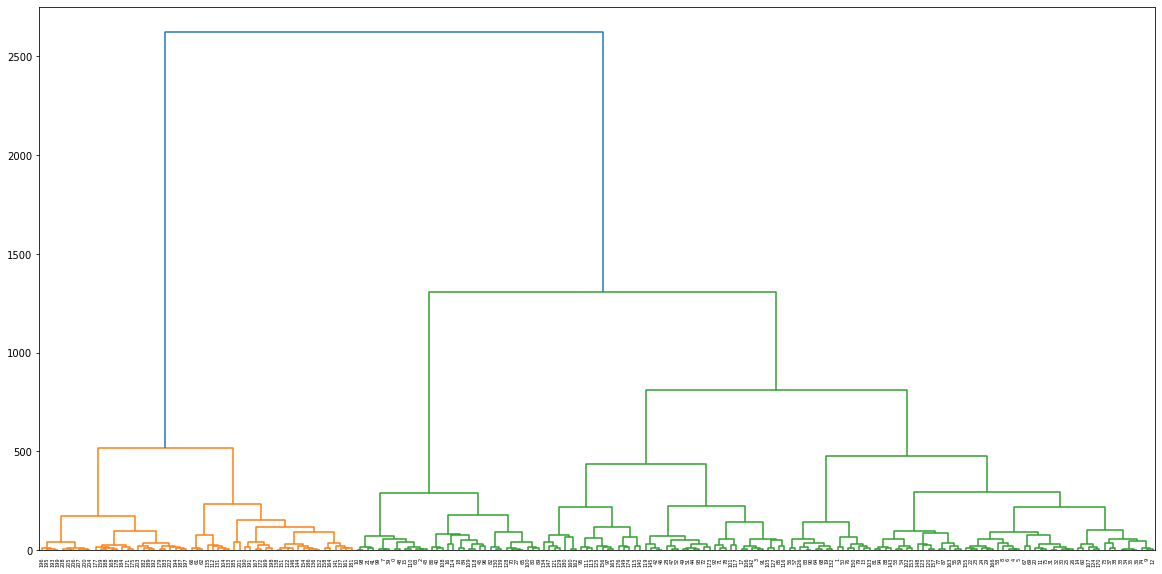

In [5]:
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [6]:
df_clusters = pd.DataFrame(list(zip(list(sentences[0]), model.labels_)), columns=['Sentence', 'Cluster'])

In [7]:
df_clusters.to_csv('../data/processed/temple_clustering_results.csv')

In [8]:
print(f"Cluster 0: {len(df_clusters[df_clusters.Cluster == 0])}")
print(f"Cluster 1: {len(df_clusters[df_clusters.Cluster == 1])}")
print(f"Cluster 2: {len(df_clusters[df_clusters.Cluster == 2])}")
print(f"Cluster 3: {len(df_clusters[df_clusters.Cluster == 3])}")

Cluster 0: 97
Cluster 1: 34
Cluster 2: 43
Cluster 3: 36


In [20]:
pd.Series(df_clusters[df_clusters.Cluster == 0].Sentence.unique()).to_csv('../data/processed/cluster0_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 1].Sentence.unique()).to_csv('../data/processed/cluster1_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 2].Sentence.unique()).to_csv('../data/processed/cluster2_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 3].Sentence.unique()).to_csv('../data/processed/cluster3_temple_results.csv', header=False)

In [10]:
result = {'Cluster':model.labels_, 'Groups': list(sentences[0])}
result = pd.DataFrame(result)

In [11]:
pd.option_context('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-11-dad16d43d4f1>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Cluster: 0


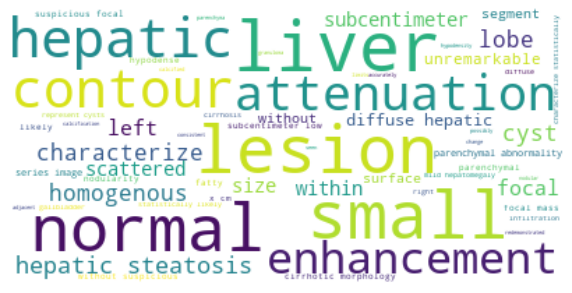

Cluster: 1


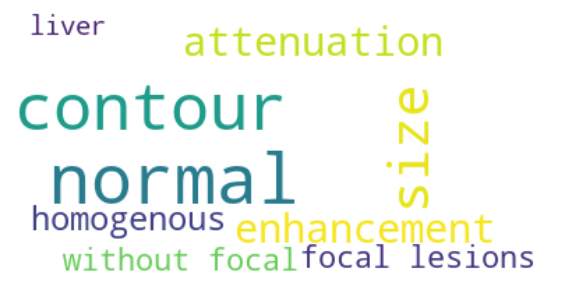

Cluster: 2


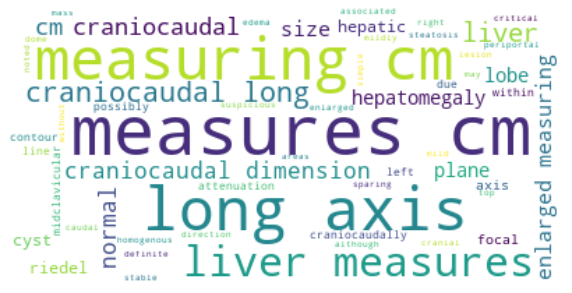

Cluster: 3


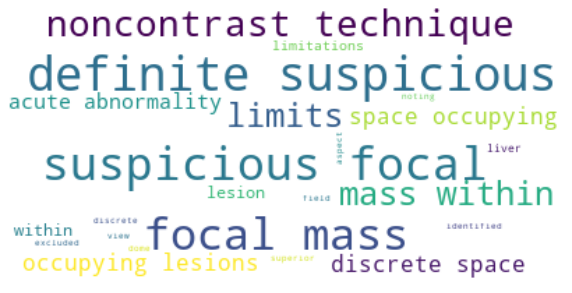

In [12]:
for k in range(0, num_clusters):
    s = result[result.Cluster == k]
    text = s['Groups'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
#     print('Sentences')
    sentences_wc = df_clusters[df_clusters.Cluster == k]['Sentence']
#     print(sentences_wc[:10].to_string(index=False))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()